In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
file_path = "LengthOfStay.csv"
df = pd.read_csv(file_path)

In [3]:
categorical_cols = ['gender', 'rcount', 'facid']
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


In [4]:
imputer_num = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])


In [5]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [6]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [7]:
df['lengthofstay'] = df['lengthofstay'].replace({'5+': 5}).astype(float)
df['lengthofstay'] = (df['lengthofstay'] > 3).astype(int)

In [8]:
df = df.drop(columns=['vdate','discharged','eid','substancedependence','psychother','fibrosisandother','neutrophils','bloodureanitro','secondarydiagnosisnonicd9','facid'])

In [17]:
df.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,psychologicaldisordermajor,depress,malnutrition,hemo,hematocrit,sodium,glucose,creatinine,bmi,pulse,respiration,lengthofstay
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5,140.361132,192.476918,1.390722,30.432418,96.0,6.5,0
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,136.731692,94.078507,0.943164,28.460516,61.0,6.5,1
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4,133.058514,130.530524,1.065750,28.843812,64.0,6.5,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,138.994023,163.377028,0.906862,27.959007,76.0,6.5,0
4,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.1,138.634836,94.886654,1.242854,30.258927,67.0,5.6,1


In [19]:
X = df.drop(columns=['lengthofstay'])
y = df['lengthofstay']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
model = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [31]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Model Accuracy: 85.77%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      9340
           1       0.93      0.79      0.86     10660

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.87      0.86      0.86     20000



In [33]:
import pickle

# Save the trained model
with open("length_of_stay_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")

Model saved successfully!


In [35]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [50]:
y

0        0
1        1
2        0
3        0
4        1
        ..
99995    1
99996    0
99997    1
99998    1
99999    0
Name: lengthofstay, Length: 100000, dtype: int32

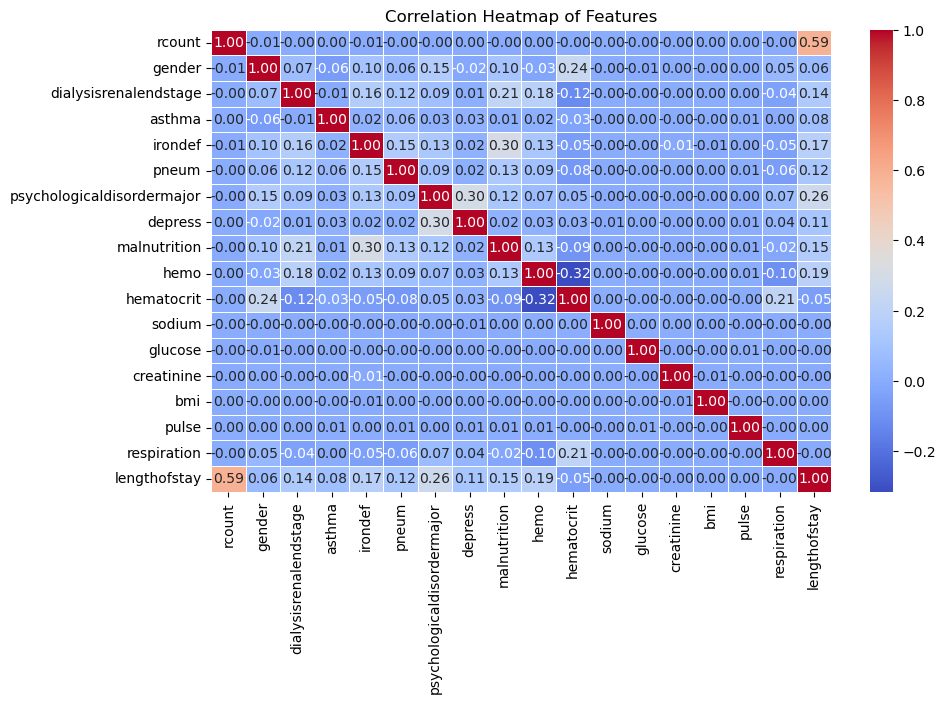

In [58]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap of Features")
plt.show()

In [37]:
# Define categorical columns
categorical_cols = ['gender', 'dialysisrenalendstage', 'asthma', 'irondef', 
                    'pneum', 'psychologicaldisordermajor', 'depress', 
                    'malnutrition', 'hemo']

# Create a dictionary to store encoders
encoders = {}

# Apply label encoding and save encoders
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Save the encoders
joblib.dump(encoders, "encoder.pkl")
print("Encoders saved successfully!")

Encoders saved successfully!
